In [1]:
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense,BatchNormalization
import sklearn
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np


In [2]:
path = 'C:/Users/Emirhan/Desktop/fer2013'

In [3]:
angry=cv2.imread(path + '/train/Angry/5.jpg')

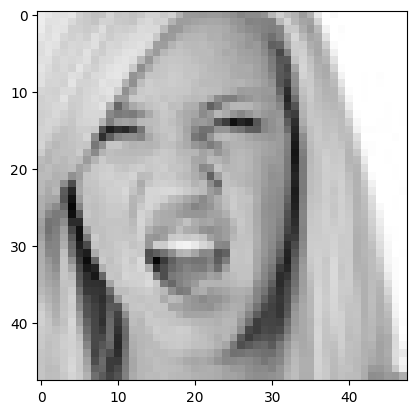

In [4]:
angry = cv2.cvtColor(angry,cv2.COLOR_BGR2RGB)
plt.imshow(angry)

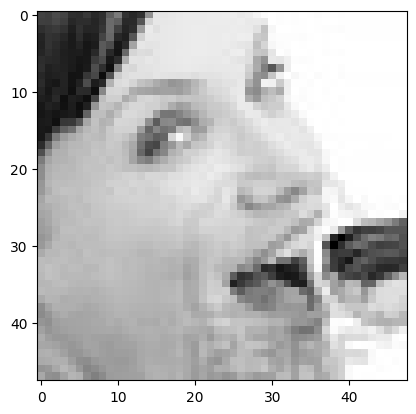

In [5]:
happy =cv2.imread(path + '/train/happy/9.jpg')
happy = cv2.cvtColor(happy,cv2.COLOR_BGR2RGB)
plt.imshow(happy)

In [6]:
happy.shape

(48, 48, 3)

### Preparing the Data

In [7]:
train_data_dir = path + '/train'
test_data_dir = path+ '/validation'

num_classes=7
batch_size = 512


In [8]:
test_data_dir

'C:/Users/Emirhan/Desktop/fer2013/validation'

In [9]:
train_data_dir

'C:/Users/Emirhan/Desktop/fer2013/train'

In [10]:
train_datagen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest'
                               )
test_datagen = ImageDataGenerator(rescale=1./255)

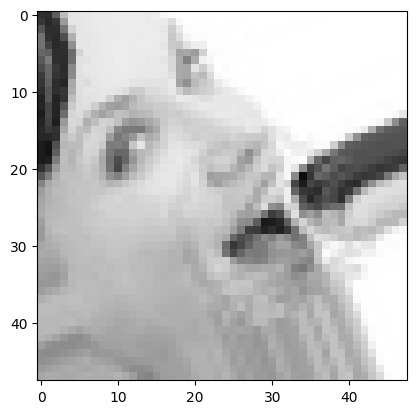

In [11]:
plt.imshow(train_datagen.random_transform(happy))

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(48,48),
    batch_size= batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(48,48),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [13]:
print(train_generator.class_indices)

{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}


### Creating Model

In [14]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = (48,48,1)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides =2))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6))


model.add(Dense(7))
model.add(Activation('softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 44, 44, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 20, 20, 64)       2

In [57]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_samples = 28709
test_samples = 3589

epochs=10

result = model.fit_generator(train_generator,
                             steps_per_epoch=train_samples // batch_size,
                             epochs=epochs,
                             validation_data=test_generator,
                             validation_steps=test_samples // batch_size)


C:\Users\Emirhan\AppData\Local\Temp\ipykernel_16956\680401047.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(train_generator,


Epoch 1/10
56/56 [==============================] - 20s 338ms/step - loss: 1.0446 - accuracy: 0.6097 - val_loss: 1.5393 - val_accuracy: 0.5354
Epoch 2/10
56/56 [==============================] - 18s 327ms/step - loss: 1.0383 - accuracy: 0.6128 - val_loss: 1.4873 - val_accuracy: 0.5301
Epoch 3/10
56/56 [==============================] - 19s 340ms/step - loss: 1.0277 - accuracy: 0.6176 - val_loss: 1.5160 - val_accuracy: 0.5299
Epoch 4/10
56/56 [==============================] - 19s 338ms/step - loss: 1.0328 - accuracy: 0.6185 - val_loss: 1.6449 - val_accuracy: 0.5318
Epoch 5/10
56/56 [==============================] - 17s 310ms/step - loss: 1.0217 - accuracy: 0.6203 - val_loss: 1.5171 - val_accuracy: 0.5377
Epoch 6/10
56/56 [==============================] - 18s 311ms/step - loss: 1.0318 - accuracy: 0.6178 - val_loss: 1.4826 - val_accuracy: 0.5193
Epoch 7/10
56/56 [==============================] - 18s 317ms/step - loss: 1.0269 - accuracy: 0.6190 - val_loss: 1.5196 - val_accuracy: 0.5296

### Model Evaluate

In [58]:
validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

Y_pred = model.predict_generator(validation_generator,test_samples//batch_size+1)
y_pred = np.argmax(Y_pred,axis = 1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Found 3589 images belonging to 7 classes.


C:\Users\Emirhan\AppData\Local\Temp\ipykernel_16956\406046592.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator,test_samples//batch_size+1)


Confusion Matrix
[[319   0  32   8  27  99   6]
 [ 35   3   3   1   1  10   2]
 [127   0 138  10  30 159  64]
 [ 48   0  20 714  29  50  18]
 [134   0  49 142  86 154  61]
 [ 83   0  32  21  81 368   9]
 [ 25   0  37  23   6  13 312]]


In [59]:
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes,y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Angry       0.41      0.65      0.51       491
     Disgust       1.00      0.05      0.10        55
        Fear       0.44      0.26      0.33       528
       Happy       0.78      0.81      0.79       879
     Neutral       0.33      0.14      0.19       626
         Sad       0.43      0.62      0.51       594
    Surprise       0.66      0.75      0.70       416

    accuracy                           0.54      3589
   macro avg       0.58      0.47      0.45      3589
weighted avg       0.53      0.54      0.51      3589



In [88]:
import cv2

image_path ='C:/Users/Emirhan/Desktop/fer2013/validation/Sad/3.jpg'

test_image_original = cv2.imread(image_path)
test_image = cv2.cvtColor(test_image_original , cv2.COLOR_BGR2GRAY)

test_data =np.reshape(test_image,(1,48,48,1))
pred = model.predict(test_data , test_samples//batch_size+1)

result = np.argmax(pred)

1/1 [==============================] - 0s 23ms/step


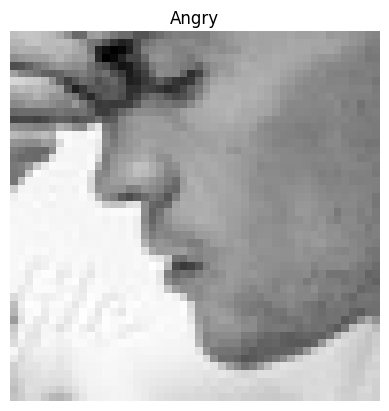

In [89]:
class_names = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Suprise']

predict = class_names[result]

plt.imshow(test_image_original)
plt.title(predict)
plt.axis('off')
plt.show()